# Penalty Restriction(Keras版本)
透過L1 & L2 Regularization來防止類神經網路overfitting

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
#     layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01 , 0.02)),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.L1(0.01))
])


#keras.optimizers.Adagrad(learning_rate=0.01)
#keras.optimizers.Adam(learning_rate=0.01)
#keras.optimizers.RMSprop(learning_rate=0.01)

# provide labels as one_hot representation => tf.keras.losses.CategoricalCrossentropy
# provide labels as integers => tf.keras.losses.SparseCategoricalCrossentropy 
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=2)



(60000, 784)   (60000,)
(10000, 784)   (10000,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
165/165 - 0s - loss: 14.0269 - accuracy: 0.6727 - val_loss: 9.2927 - val_accuracy: 0.8248
Epoch 2/100
165/165 - 0s - loss: 8.2833 - accuracy: 0.8570 - val_loss: 7.4561 - val_accuracy: 0.87

# Dropout(Keras版本)
類似負重訓練的效果，在training時將部分neuron移除，test時再補回來!

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.L1(0.01))
])


#keras.optimizers.Adagrad(learning_rate=0.01)
#keras.optimizers.Adam(learning_rate=0.01)
#keras.optimizers.RMSprop(learning_rate=0.01)

# provide labels as one_hot representation => tf.keras.losses.CategoricalCrossentropy
# provide labels as integers => tf.keras.losses.SparseCategoricalCrossentropy 
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=2)

(60000, 784)   (60000,)
(10000, 784)   (10000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
____

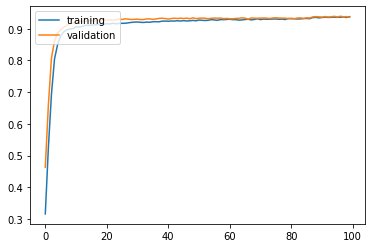

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [10]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 0s 601us/step - loss: 0.4262 - accuracy: 0.9404
[0.42615756392478943, 0.9404000043869019]
